# Drill: Present the same data multiple ways

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 14})

https://www.kaggle.com/naghari/youtube-trending-analysis/data

In [21]:
yt_data= pd.read_csv('USvideos.csv')

In [3]:
yt_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [22]:
#The dataset's high numbers were making the graphs nearly impossible to deal with for certain graphs, so I had to cut the numbers down
df_subset = yt_data[yt_data['views'] < yt_data['views'].quantile(0.50)]

In [23]:
df_subset = df_subset[df_subset['views'] > df_subset['views'].quantile(0.10)]

In [24]:
df_subset.describe()

,category_id,views,likes,dislikes,comment_count
count,13207.000000,13207.000000,13207.000000,13207.000000,13207.000000
mean,20.865299,199138.632240,7350.491785,326.885970,915.497312
std,7.095172,124453.965861,7825.192392,695.168962,1138.480932
min,1.000000,21278.000000,0.000000,0.000000,0.000000
25%,17.000000,86404.500000,1671.000000,76.000000,252.000000
50%,24.000000,183721.000000,4847.000000,171.000000,586.000000
75%,25.000000,297460.500000,10558.000000,339.000000,1171.500000
max,43.000000,456262.000000,106536.000000,19201.000000,22062.000000


### Choose one variable and plot that variable four different ways.

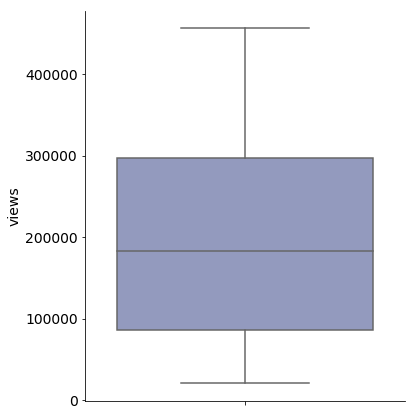

In [25]:
sns.factorplot(y= 'views', data = df_subset, kind = 'box', palette = 'BuPu', size = 6)
plt.ylabel("views")
plt.show()

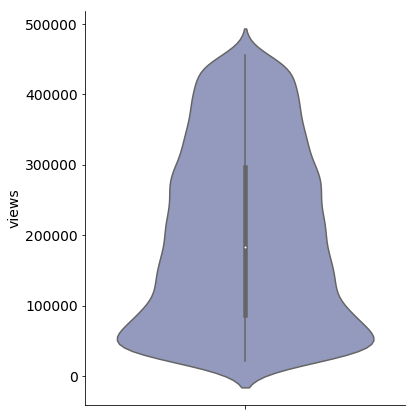

In [26]:
sns.factorplot(y= 'views', data = df_subset, kind = 'violin', palette = 'BuPu', size = 6)
plt.ylabel("views")
plt.show()

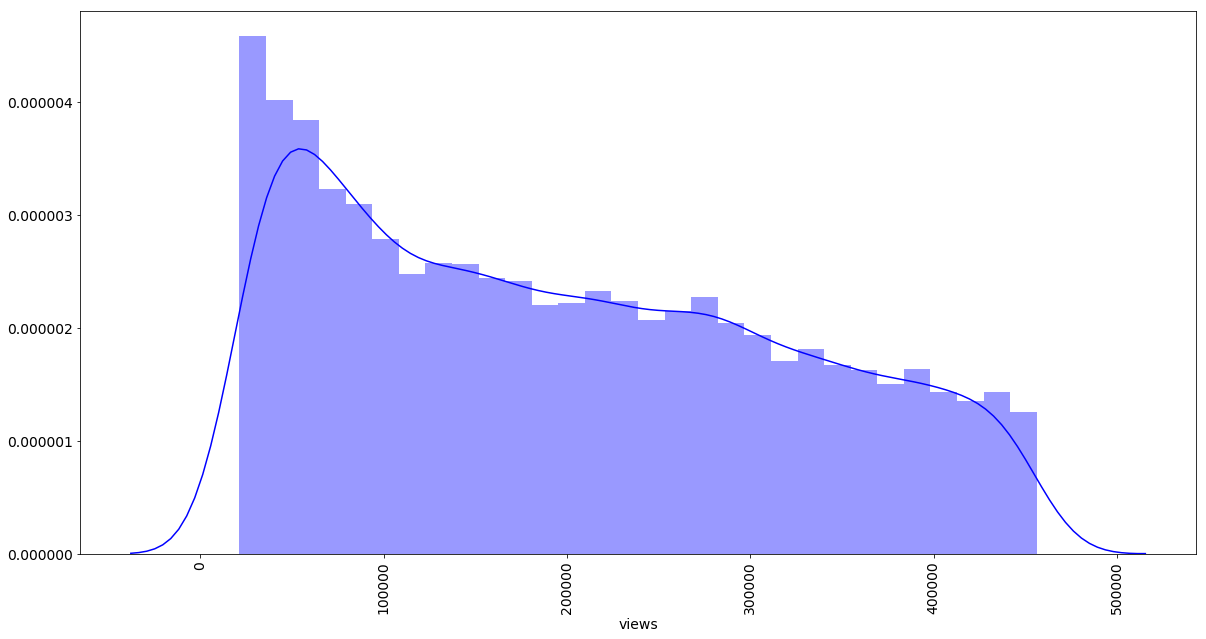

In [27]:
sns.distplot(df_subset.views, color = 'b', bins= 30)
plt.xticks(rotation = 90)
plt.show()

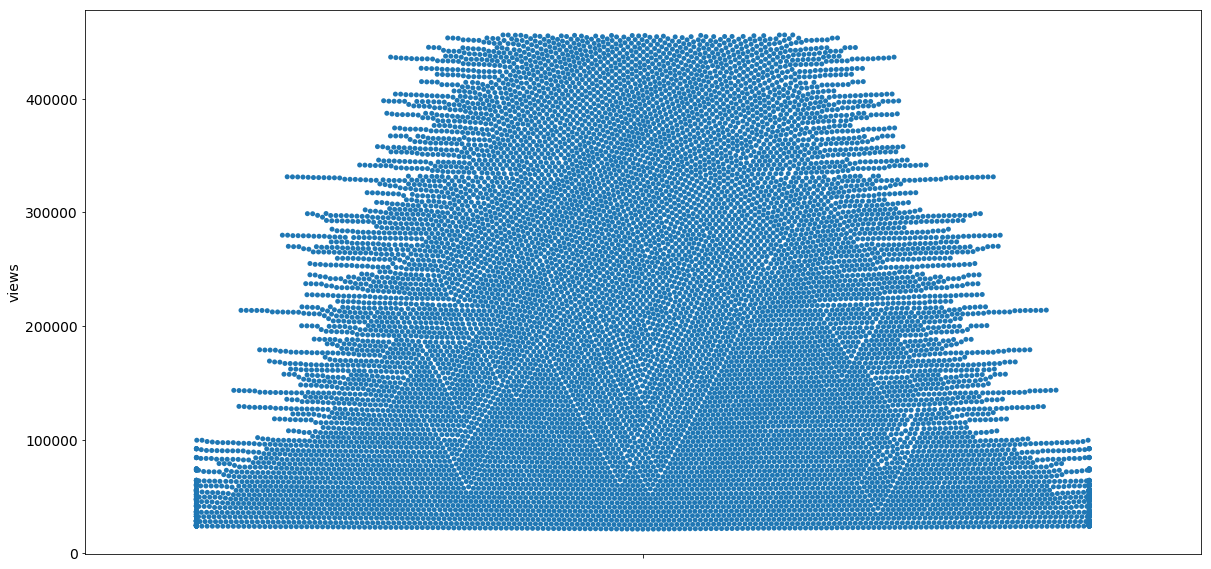

In [62]:
sns.swarmplot(y= 'views', data = df_subset)             
plt.show()

### Choose two continuous variables, and plot them three different ways.

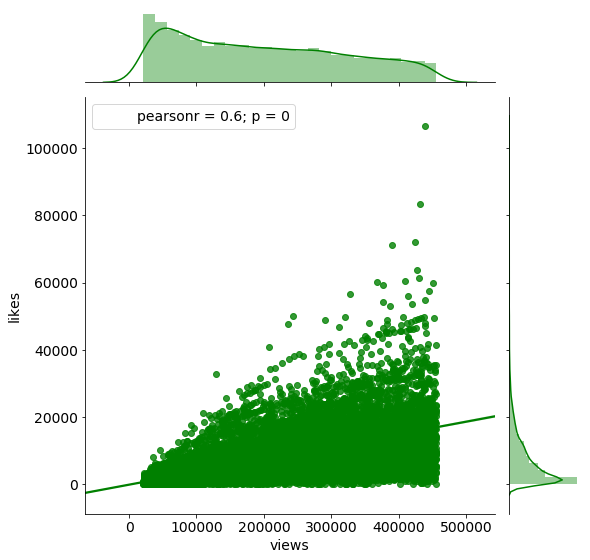

In [28]:
sns.jointplot(x='views', y='likes', data= df_subset, color = 'g', size = 8, kind = 'reg')
plt.show()

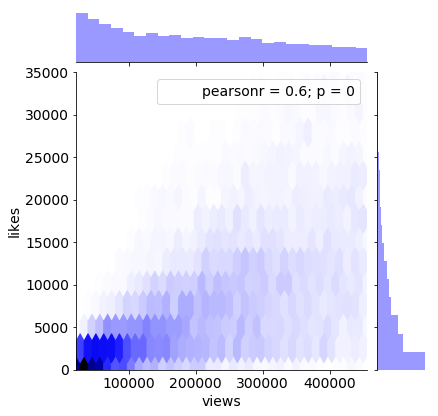

In [70]:
sns.jointplot(df_subset.views, df_subset.likes, kind="hex", color="b")
plt.ylim(0, 35000)
plt.show()

C:\Users\blindside\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'size'
  s)


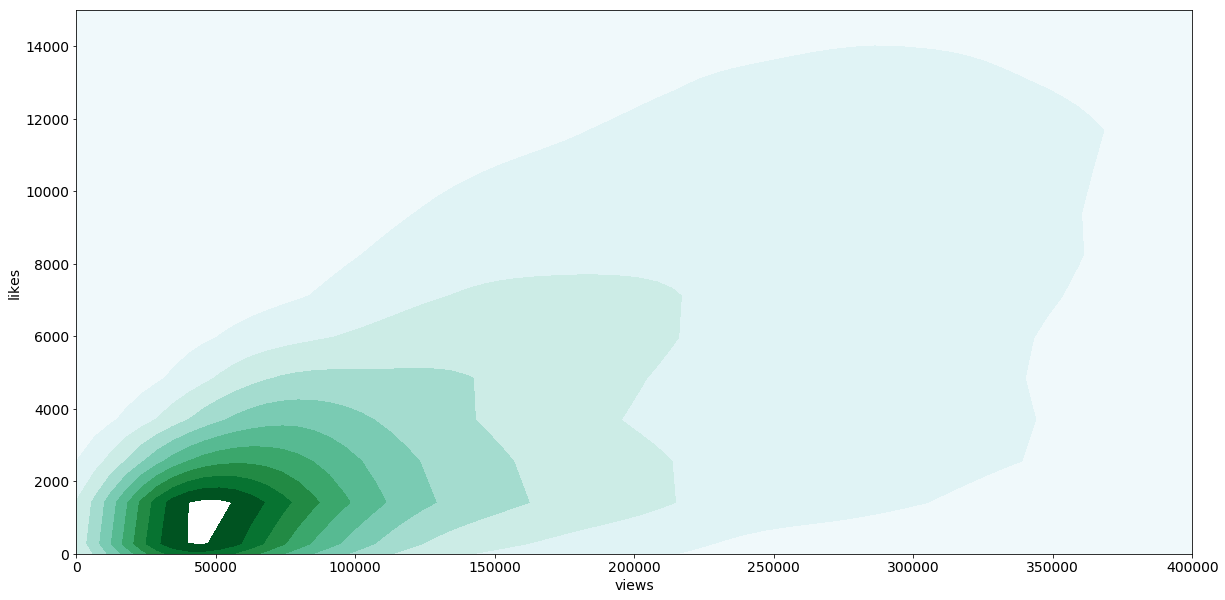

In [51]:
sns.kdeplot(df_subset.views, df_subset.likes, size= 9, shade=True)
plt.xlim(0, 400000)
plt.ylim(0, 15000)
plt.show()

### Choose one continuous variable and one categorical variable, and plot them six different ways.

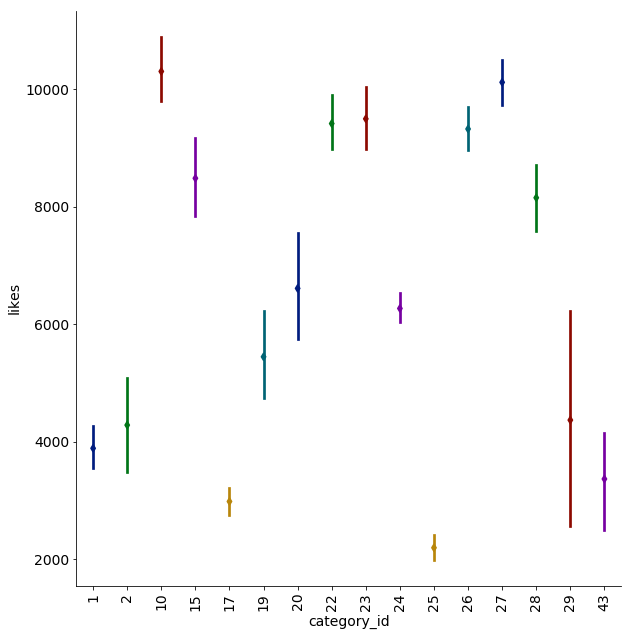

In [32]:
sns.factorplot(x='category_id', y= 'likes',  data = df_subset, kind = 'point', size = 9,
              palette="dark", markers="d", scale=.75)
plt.xticks(rotation = 90)
plt.show()

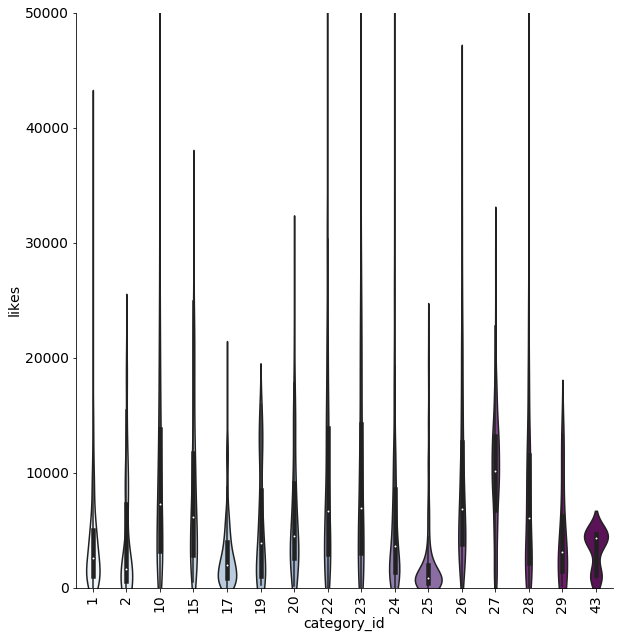

In [69]:
sns.factorplot(x= 'category_id', y= 'likes',  data = df_subset, kind = 'violin', palette = 'BuPu', size = 9)
plt.ylim(0, 50000)
plt.xticks(rotation = 90)
plt.show()

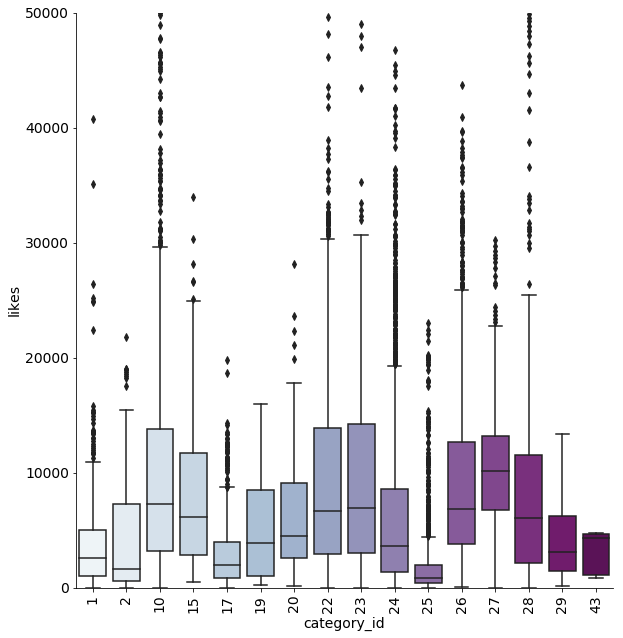

In [39]:
sns.factorplot(x='category_id', y= 'likes',  data = df_subset, kind = 'box', palette = 'BuPu', size = 9, dodge=True)
plt.ylim(0, 50000)
plt.xticks(rotation = 90)
plt.show()

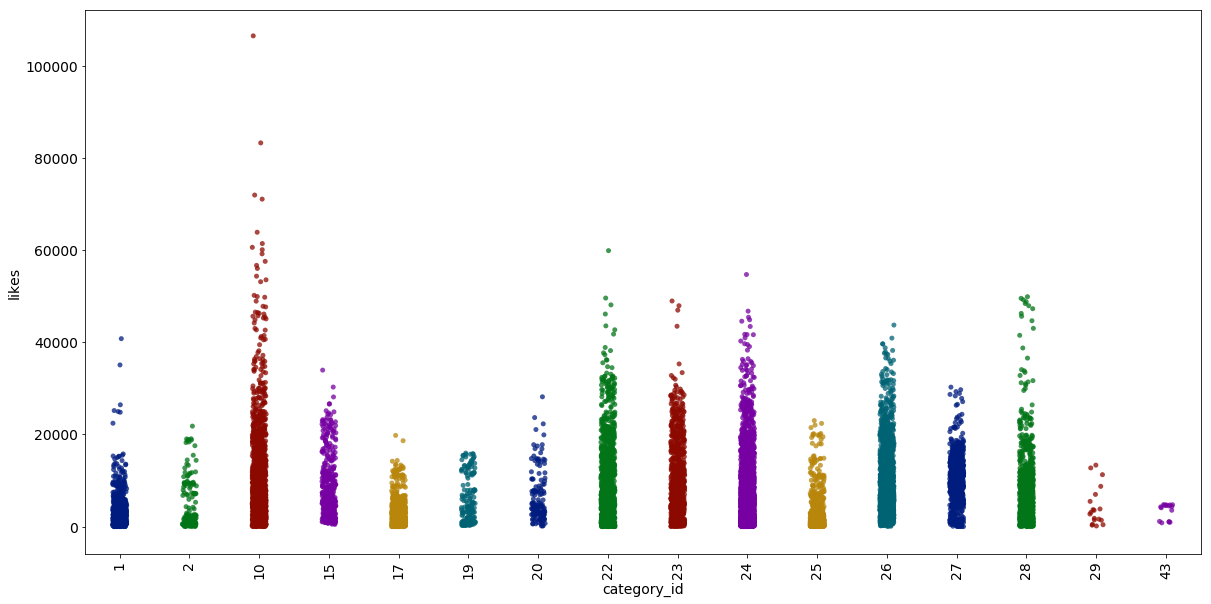

In [41]:
sns.stripplot(x='category_id', y= 'likes',  data = df_subset, 
              dodge=True, jitter = True, palette="dark",
              alpha=.75)
plt.xticks(rotation = 90)
plt.show()

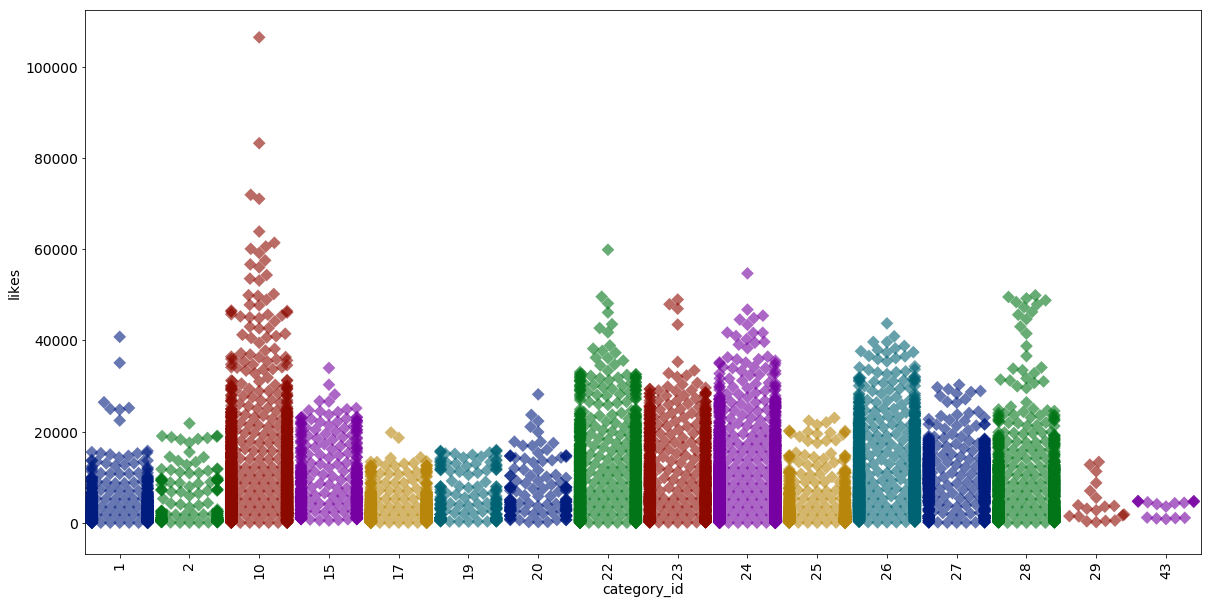

In [68]:
sns.swarmplot(x='category_id', y= 'likes',  data = df_subset, size= 9, dodge=True, alpha = .60, palette="dark", marker= 'D')
plt.xticks(rotation = 90)
plt.show()

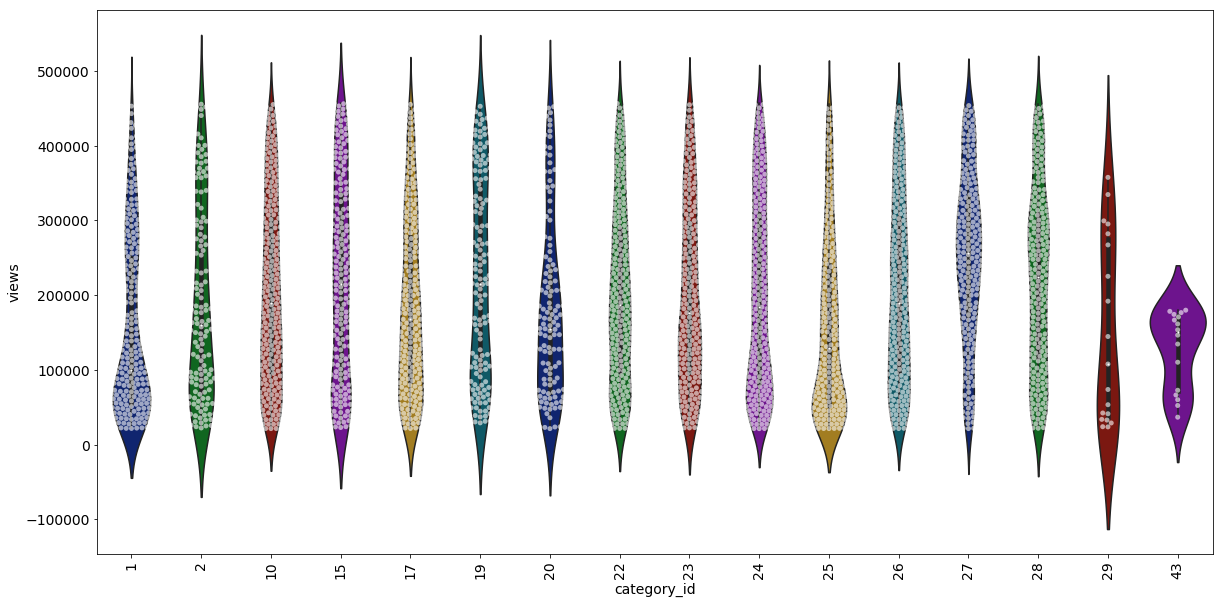

In [66]:
sns.violinplot(x = 'category_id', y= 'views', data = df_subset, palette="dark", size = 15)
sns.swarmplot(x = 'category_id', y= 'views', data = df_subset, dodge=True, alpha = .60, color = 'white', edgecolor = 'gray')
plt.xticks(rotation = 90)
plt.show()